In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
sales_data= pd.read_csv('Company_Data.csv')
sales_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [230]:
sales_data[sales_data['Sales']>=11].head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_status
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,1
11,11.96,117,94,4,503,94,Good,50,13,Yes,Yes,1
14,11.17,107,117,11,148,118,Good,52,18,Yes,Yes,1
17,12.29,147,74,13,251,131,Good,52,10,Yes,Yes,1
18,13.91,110,110,0,408,68,Good,46,17,No,Yes,1
21,12.13,134,29,12,239,109,Good,62,18,No,Yes,1
25,14.90,139,32,0,176,82,Good,54,11,No,No,1
30,13.55,125,94,0,447,89,Good,30,12,Yes,No,1
35,11.07,131,84,11,29,96,Medium,44,17,No,Yes,1


In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
sales_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [234]:
sales_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_status'],
      dtype='object')

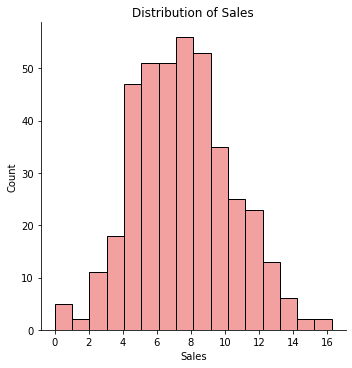

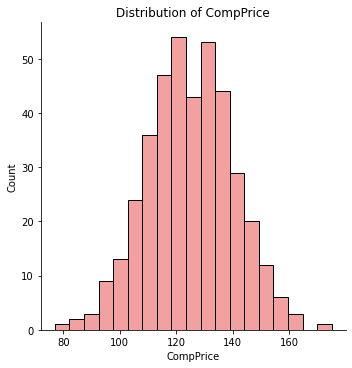

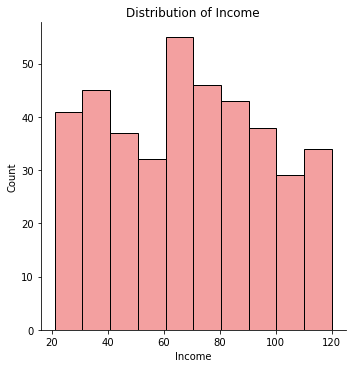

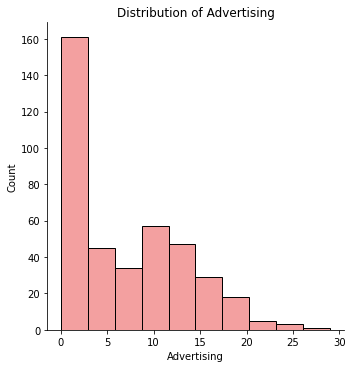

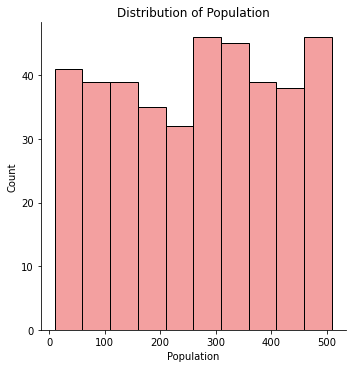

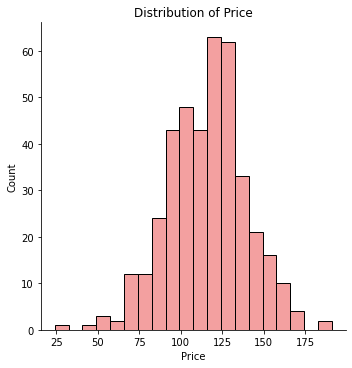

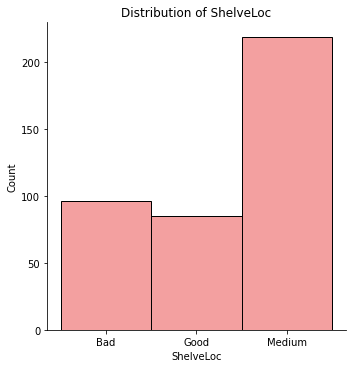

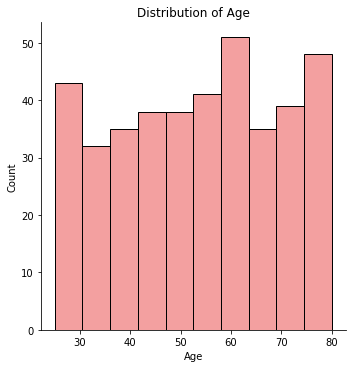

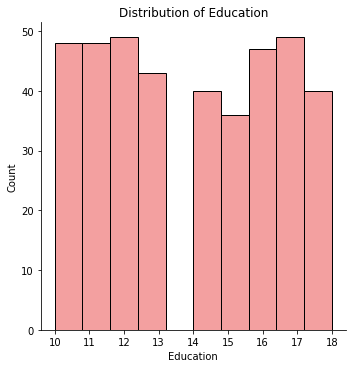

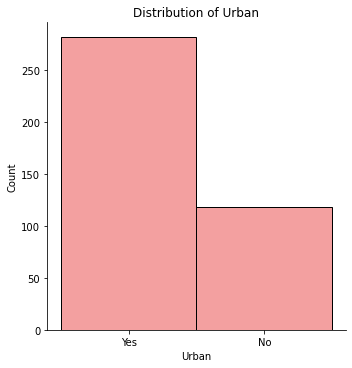

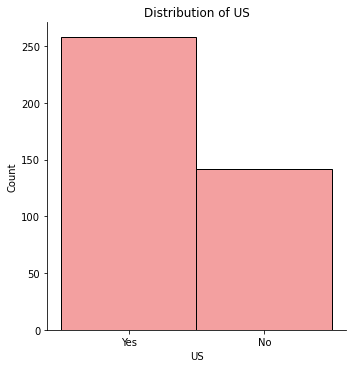

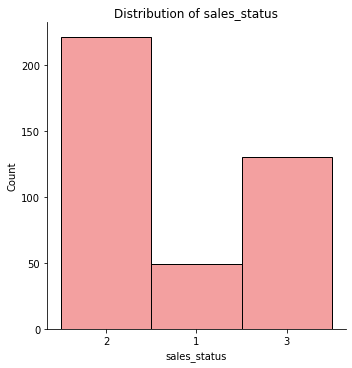

In [241]:
for i in sales_data.columns:
    sns.displot(x=i,data = sales_data,color='#F08080')
    plt.title("Distribution of {}".format(i))

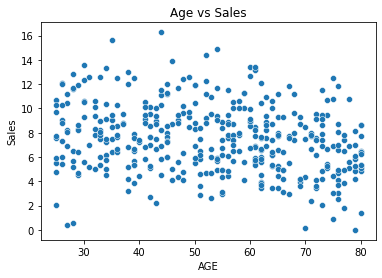

In [242]:
plt.title('Age vs Sales')
plt.xlabel("AGE",)
sns.scatterplot(x='Age',y='Sales',data=sales_data);

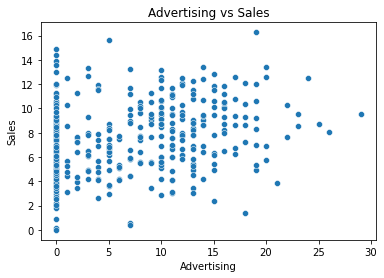

In [243]:
plt.title('Advertising vs Sales')
plt.xlabel("Advertising",)
sns.scatterplot(x='Advertising',y='Sales',data=sales_data);

In [12]:
def get_categorical_data(X):
    sales_status=[]
    for i in X:
        if i>=11:
            sales_status.append('1')
        elif (i>=6):
            sales_status.append('2')
        elif i<6:
            sales_status.append('3')
    return sales_status

In [13]:
x= sales_data['Sales']
sales_data['sales_status']= get_categorical_data(x)
sales_data.sales_status.value_counts()

2    221
3    130
1     49
Name: sales_status, dtype: int64

In [14]:
X=sales_data.iloc[:,1:11]
Y=sales_data.iloc[:,11]


In [15]:
#label encoding for ShelveLoc,Urban and us columns
le=LabelEncoder()
X['ShelveLoc'] =le.fit_transform(X['ShelveLoc'])
X['Urban']= le.fit_transform(X['Urban'])
X['US']= le.fit_transform(X['US'])

In [16]:
#splitting into train and test 
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.15,random_state=44)

# <font color= 	#FFD39B>Building a tree model with entropy</font>

In [122]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [123]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

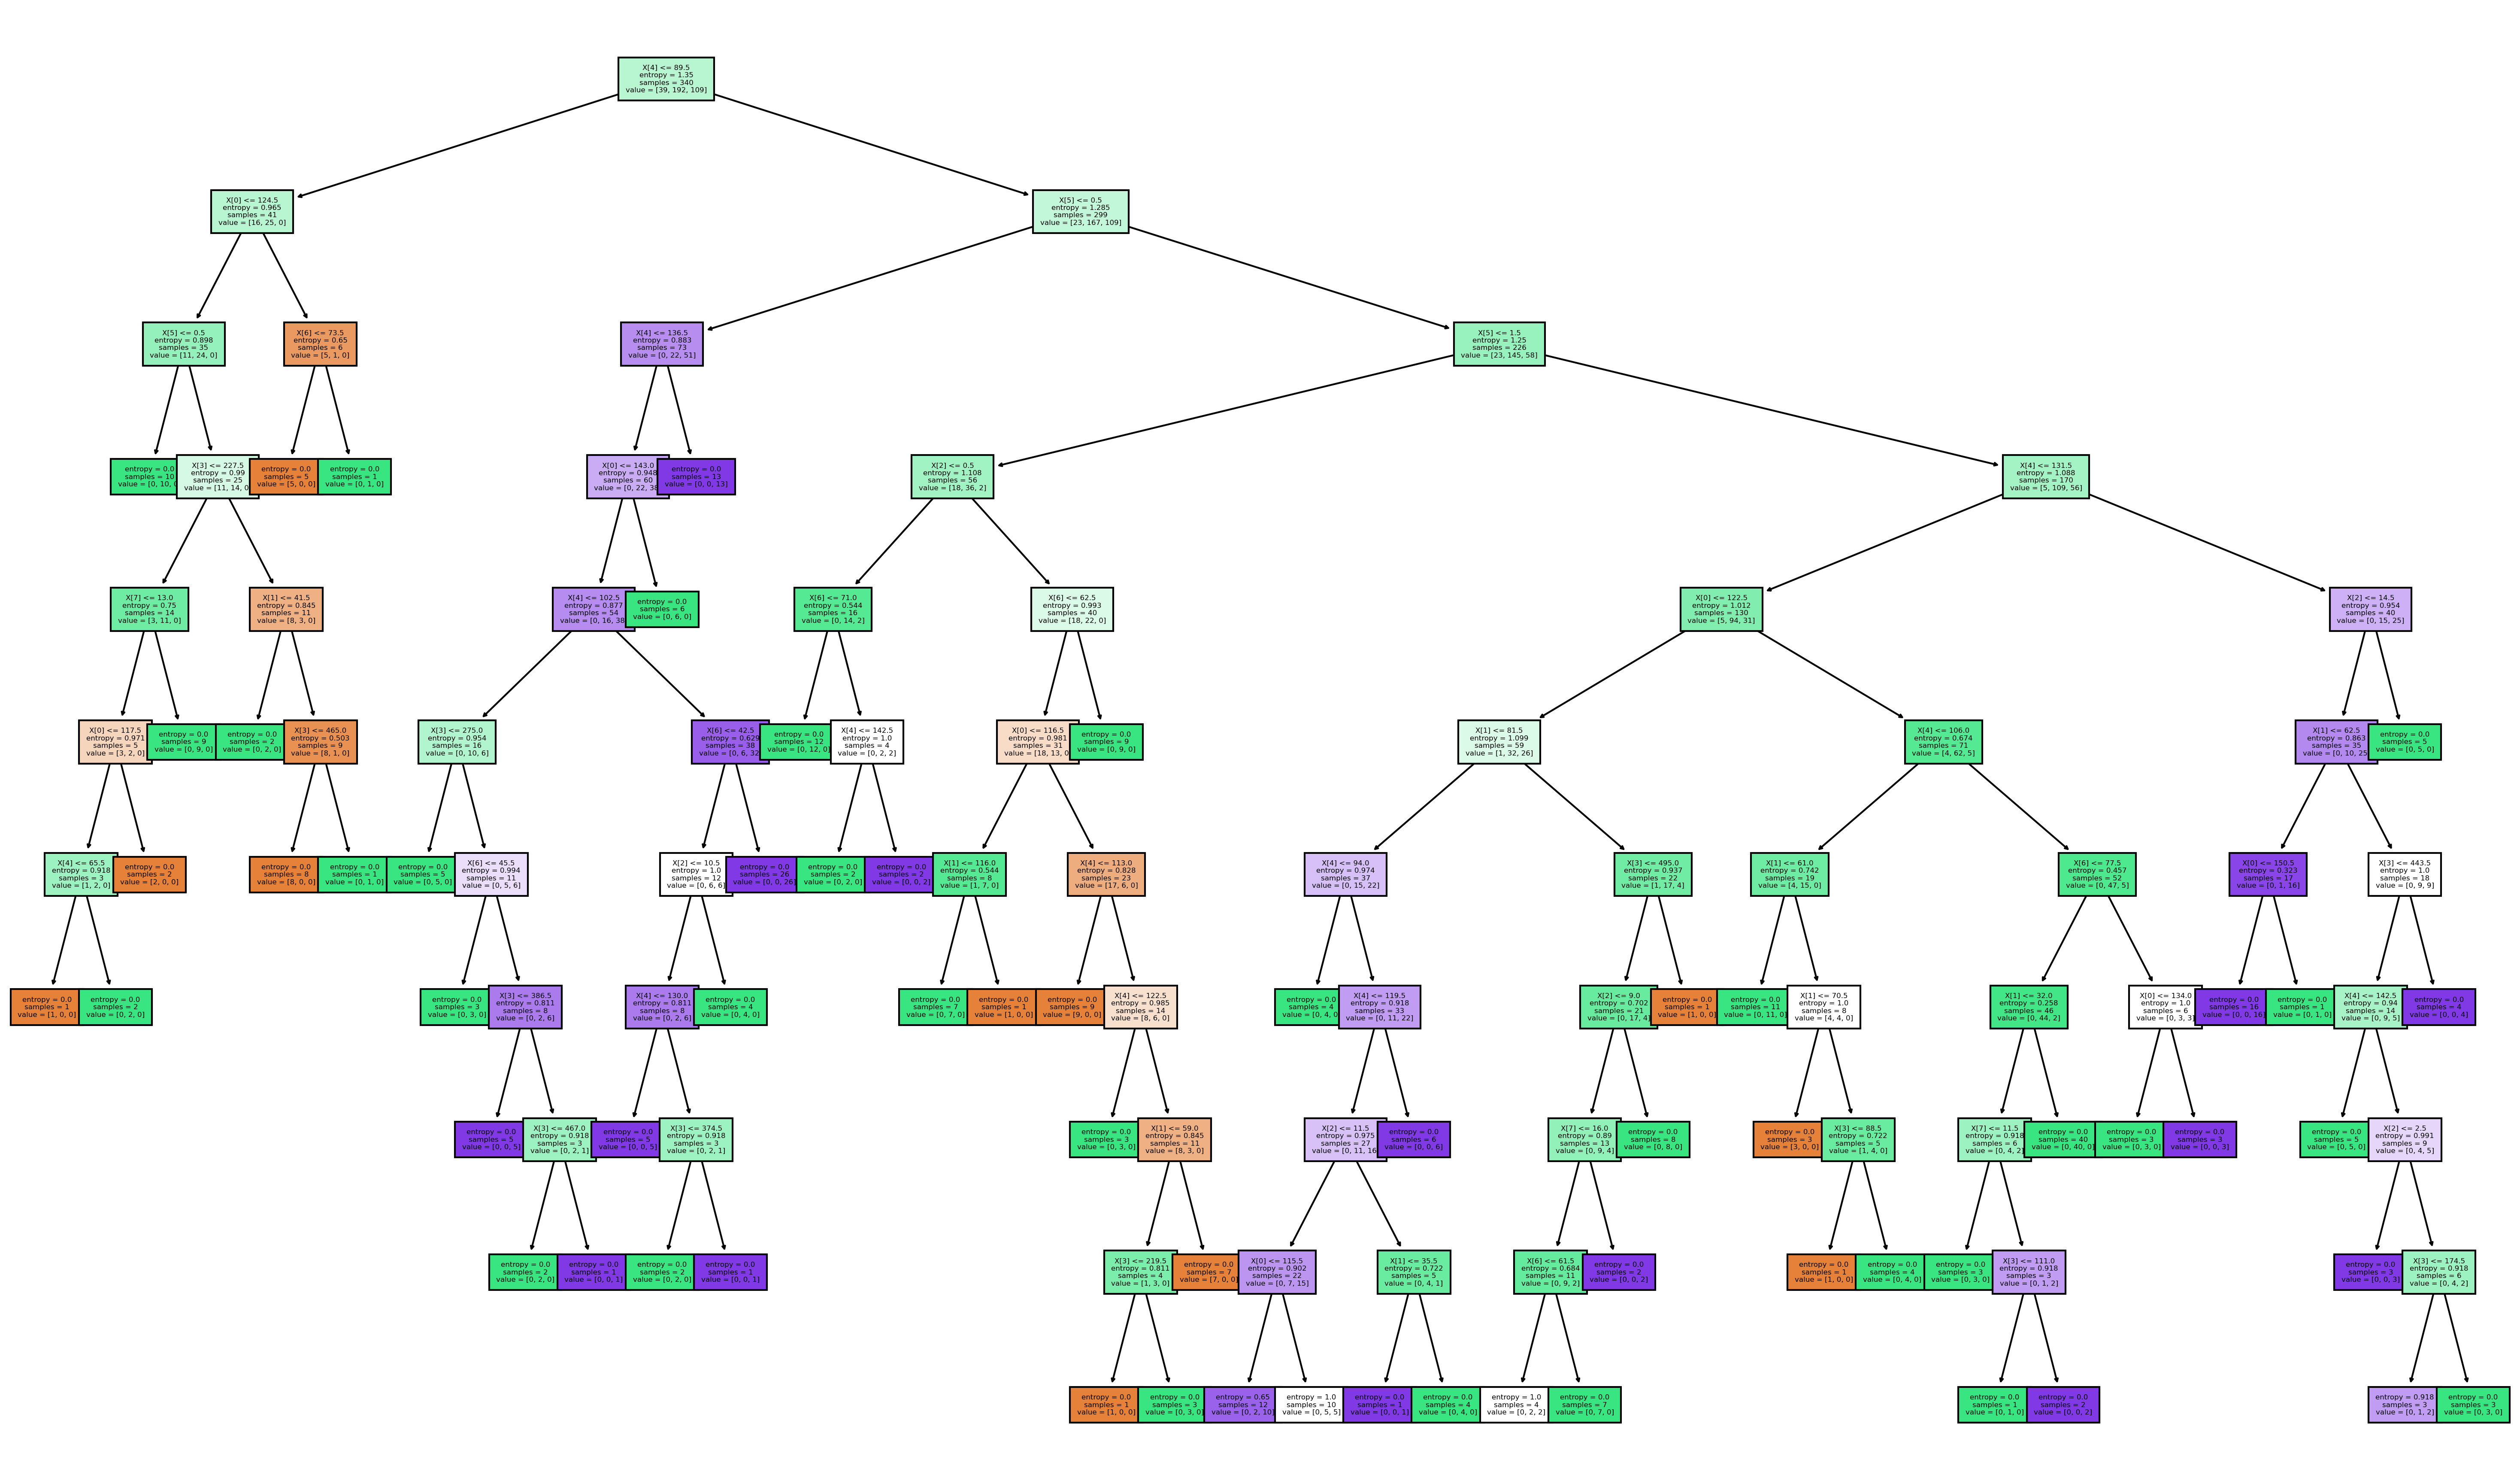

In [143]:
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,15), dpi=300)
plt.title("Tree Visualized")
tree.plot_tree(model,filled=True,fontsize=4)
plt.show();

In [125]:
preds=model.predict(X_test)
preds

array(['2', '2', '2', '2', '2', '3', '3', '2', '2', '2', '3', '3', '1',
       '3', '2', '2', '2', '2', '1', '2', '2', '3', '2', '2', '3', '2',
       '2', '3', '1', '2', '2', '1', '1', '2', '2', '2', '2', '3', '2',
       '3', '2', '3', '2', '2', '2', '2', '2', '2', '3', '2', '1', '3',
       '3', '3', '2', '3', '1', '2', '2', '3'], dtype=object)

In [126]:
pd.Series(preds).value_counts()

2    36
3    17
1     7
dtype: int64

In [127]:
pd.crosstab(Y_test,preds)

col_0,1,2,3
sales_status,,,
1,5,5,0
2,2,26,1
3,0,5,16


In [128]:
print("The test data accuracy is :" +str(np.mean(preds==Y_test)))

The test data accuracy is :0.7833333333333333


In [129]:
pred1=model.predict(X_train)

In [130]:
pd.Series(pred1).value_counts()

2    196
3    105
1     39
dtype: int64

In [131]:
pd.crosstab(pred1,Y_train)

sales_status,1,2,3
row_0,,,
1,39,0,0
2,0,189,7
3,0,3,102


In [132]:
print("The training data accuracy is :" + str(np.mean(pred1==Y_train)))

The training data accuracy is :0.9705882352941176


# Building a model with gini index

In [220]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=10)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

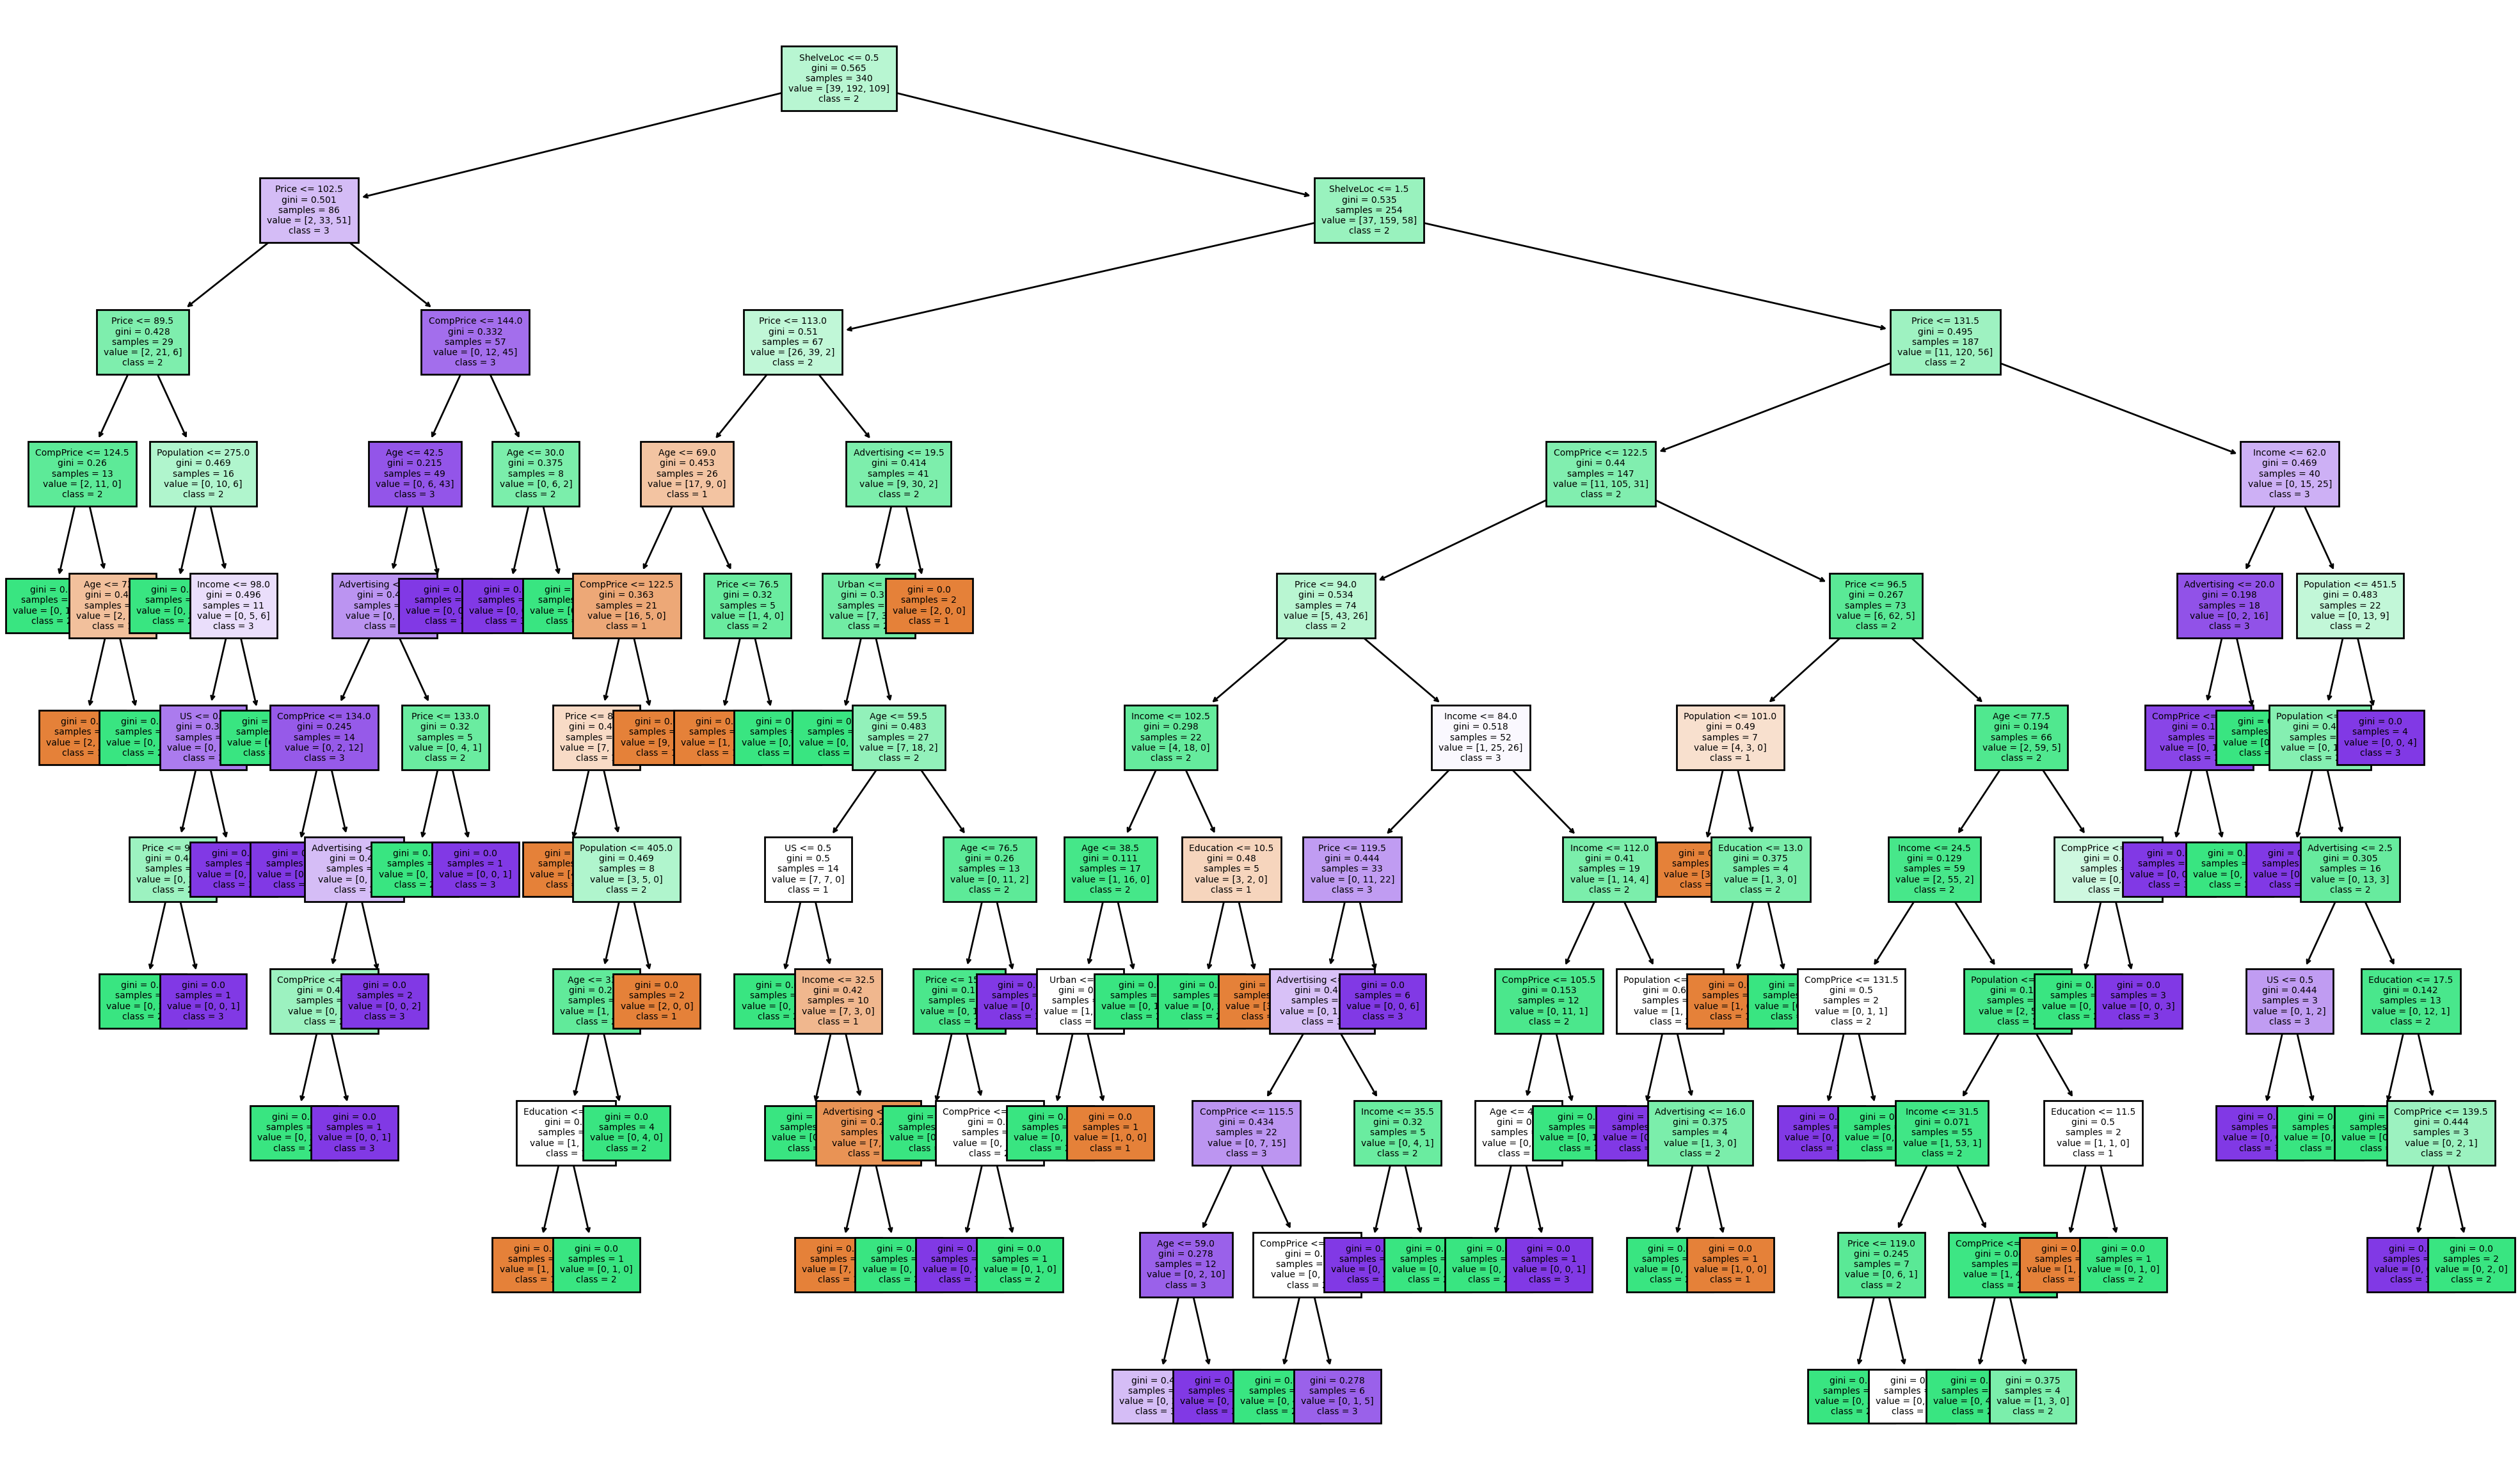

In [221]:
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,15), dpi=200)
features=X_train.columns
tree.plot_tree(model_gini,filled=True,fontsize=5,feature_names=features,class_names=['1','2','3']);

### Model Validation

In [222]:
pred_on_train_data=model_gini.predict(X_train)

In [223]:
pd.Series(pred_on_train_data).value_counts()

2    191
3    111
1     38
dtype: int64

In [224]:
pd.crosstab(pred_on_train_data,Y_train)

sales_status,1,2,3
row_0,,,
1,38,0,0
2,1,189,1
3,0,3,108


In [225]:
print("The training data accuracy is :" + str(np.mean(pred_on_train_data==Y_train)))

The training data accuracy is :0.9852941176470589


In [226]:
pred_on_test_data= model_gini.predict(X_test)
pd.Series(pred_on_test_data).value_counts()

2    32
3    19
1     9
dtype: int64

In [227]:
pd.crosstab(pred_on_test_data,Y_test)

sales_status,1,2,3
row_0,,,
1,5,4,0
2,5,22,5
3,0,3,16


In [228]:
print("The test data accuracy is :" + str(np.mean(pred_on_test_data==Y_test)))

The test data accuracy is :0.7166666666666667
